In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cartopy.crs as ccrs


sns.set(font_scale=2)
n = np.nan
source_path = "source/"
metar_source = "source_disk/METAR/"
ds = pd.read_csv(source_path+"dataset_new.csv")
ands = pd.read_csv(source_path+"analysis_dataset_new.csv")

outsource = "../Thesis_source/MasterThesis/Figures/"
M = np.array(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
ds

,date,time,place1,place2,lat,lon,height,temp,type
0,20080205,7,ENBR,NaN,60.291,5.222,2499.992,NaN,FW
1,20080213,17,ENAT,NaN,69.980,23.360,13000.000,NaN,FW
2,20080222,8,ENFL,NaN,61.390,5.020,3800.000,NaN,FW
3,20080404,18,ENBR,NaN,60.291,5.220,3000.000,NaN,FW
4,20080415,15,ENCN,NaN,58.210,8.080,NaN,NaN,FW
...,...,...,...,...,...,...,...,...,...
275,20181030,21,ENZV,NaN,59.350,6.017,8000.000,NaN,FW
276,20181130,18,ENBR,NaN,60.291,5.222,6000.000,NaN,FW
277,20190101,14,ENBO,NaN,67.270,14.350,NaN,NaN,FW
278,20190114,8,ENML,NaN,62.745,7.263,91.000,NaN,FW


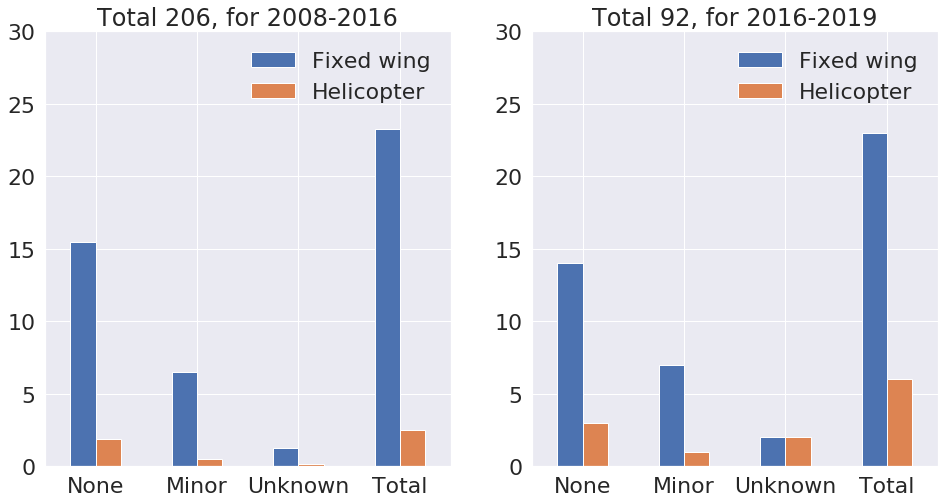

In [6]:
total_cases = pd.read_csv("../Cases/filtrert/lightningstrikes2008_early2019.csv",index_col=0)
total_cases = total_cases.drop(["Total fatalities","Total serious injuries","Total minor injuries","UTC time","Location name","Call sign"],axis=1)
damage_level = []
helilist = ['N2018-00719', 'N2018-00688', 'N2018-00407', 'N2018-00013', 'N2017-06750', 'N2017-06667', 'N2017-06632', 'N2017-00190', 'N2017-00167', 'N2016-07544', 'N2016-06671', 'N2016-01390', 'N2016-00454', 'N2016-00447', 'N2015-06863', 'N2015-06219', 'N2015-01014', 'N2014-06025', 'N2013-05746', 'N2013-01655', 'N2013-01054', 'N2013-00491', 'N2012-05146', 'N2012-05145', 'N2012-04086', 'N2009-00301', 'N2018-01886', 'N2018-00199', 'N2016-03189', 'N2015-01000', 'N2015-00477', 'N2015-00418', 'N2015-00402', 'N2014-06346', 'N2013-04946', 'N2013-01264', 'N2009-03171']
type_list = []

damage_level2 = []
type_list2 = []
for i,row in total_cases.iterrows():
    flag=0

    if int(row["UTC date"].split("/")[-1]) > 2016:
        damage_level.append(row["Highest damage"])
        flag = 1
    elif int(row["UTC date"].split("/")[-1]) == 2016:
        if int(row["UTC date"].split("/")[2]) > 10:
            damage_level.append(row["Highest damage"])
            flag=1
    else:
        flag = 0
        damage_level2.append(row["Highest damage"])
        if i in helilist:
            type_list2.append("H")
        elif i[0] != "N":
            type_list2.append("H")
        else:
            type_list2.append("FW")    
    if flag:
        if i in helilist:
            type_list.append("H")
        elif i[0] != "N":
            type_list.append("H")
        else:
            type_list.append("FW")

Min = {"H":0,"FW":0}
No  = {"H":0,"FW":0}
Unk = {"H":0,"FW":0}

for item,typ in zip(damage_level,type_list):
    if item == "None":
        No[typ]+=1
    elif item == "Minor":
        Min[typ] +=1
    else:
        Unk[typ] += 1
oper = pd.DataFrame({"None":[No["FW"],No["H"]], "Minor": [Min["FW"],Min["H"]],"Unkown":[Unk["FW"],Unk["H"]]},index=["Fixed wing","Helicopter"])

Min = {"H":0,"FW":0}
No  = {"H":0,"FW":0}
Unk = {"H":0,"FW":0}

for item,typ in zip(damage_level2,type_list2):
    if item == "None":
        No[typ]+=1
    elif item == "Minor":
        Min[typ] +=1
    else:
        Unk[typ] += 1
NoOper = pd.DataFrame({"None":[No["FW"],No["H"]], "Minor": [Min["FW"],Min["H"]],"Unkown":[Unk["FW"],Unk["H"]]},index=["Fixed wing","Helicopter"])

fig, (ax1,ax2)  = plt.subplots(ncols=2,figsize=(16,8))



NoOper = NoOper.transpose()
N = NoOper.sum().sum()
NoOper = NoOper/(2016-2008)
NoOper = NoOper.append(NoOper.sum(),ignore_index=1)

NoOper.plot(kind="bar",ax=ax1)
ax1.set_title("Total %i, for 2008-2016"%(N))
ax1.set_xticklabels(["None","Minor","Unknown","Total"],rotation=0)
ax1.set_ylim(0,30);
ax1.legend(framealpha=0)


oper = oper.transpose()
N = oper.sum().sum()
oper = oper//(2019-2016)
oper = oper.append(oper.sum(),ignore_index=1)

oper.plot(kind="bar",ax=ax2)
ax2.set_title("Total %i, for 2016-2019"%(N))
ax2.set_xticklabels(["None","Minor","Unknown","Total"],rotation=0)
ax2.set_ylim(0,30);
plt.legend(framealpha=0)

plt.savefig(outsource+"Casesperyear.pdf",bbox_inches = 'tight', pad_inches = 0.01)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

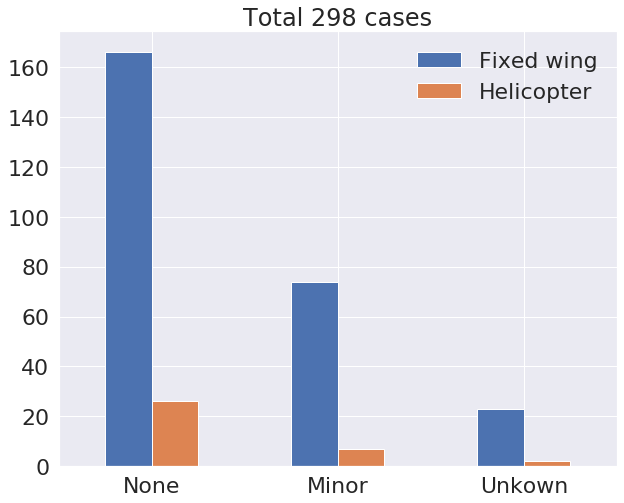

In [3]:
total = pd.DataFrame({"None":[166,26,192], "Minor": [74,7,81],"Unkown":[23,2,25]},index=["Fixed wing","Helicopter","All"])
total = total.transpose()
N = total["All"].sum()
#total = total/total.sum()
fig = plt.figure(figsize=(10,8))
ax = plt.subplot()
total.plot(kind="bar",ax=ax,y=["Fixed wing","Helicopter"])
plt.title("Total %i cases"%(N))
plt.xticks(rotation=0)


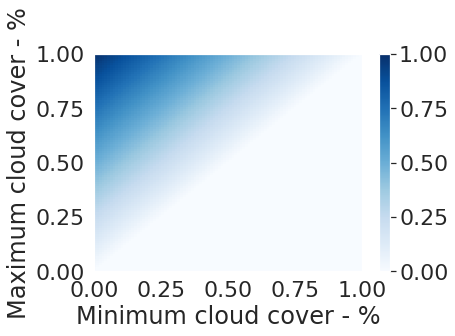

In [8]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X,Y = np.meshgrid(x,y)
plt.pcolormesh(x,y,Y-X,cmap="Blues",vmin=0,vmax = 1)
plt.colorbar()
plt.xlabel("Minimum cloud cover - %")
plt.ylabel("Maximum cloud cover - %")
plt.savefig(outsource+"CCvar.pdf",bbox_inches = 'tight', pad_inches = 0.01)

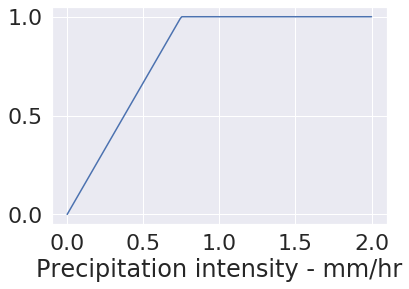

In [9]:
Px = np.linspace(0,2,200)
def Py(P):
    out = np.zeros(len(P))
    for i,P_ in enumerate(P):
        if P_ < 0:
            out[i] = 0
        elif P_ > 0.75:
            out[i] = 1
        else:
            out[i] = ((1)/(.75))*P_
    return out
plt.plot(Px,Py(Px))
plt.xlabel("Precipitation intensity - mm/hr")
plt.savefig(outsource+"Pvar.pdf",bbox_inches = 'tight', pad_inches = 0.01)

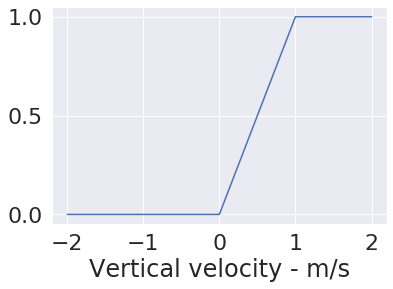

In [10]:
Wx = np.linspace(-2,2,1000)
def Wy(W):
    out = np.zeros(len(W))
    for i,W_ in enumerate(W):
        if W_ <= 0:
            out[i] = 0
        elif W_ > 1:
            out[i] = 1
        else:
            out[i] = W_
    return out
plt.plot(Wx,Wy(Wx))
plt.xlabel("Vertical velocity - m/s")
plt.savefig(outsource+"Wvar.pdf",bbox_inches = 'tight', pad_inches = 0.01)

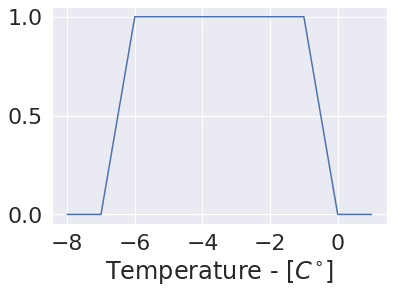

In [11]:
Tx = np.linspace(-8,1,100)

@np.vectorize
def Ty(T):
    if T < -6:
        return max(1+T+6,0.0)
    elif T > -1:
        return abs(min(T,0))
    else:
        return 1
plt.plot(Tx,Ty(Tx))
plt.xlabel("Temperature - [$C^{\circ}$]")
plt.savefig(outsource+"Tvar.pdf",bbox_inches = 'tight', pad_inches = 0.01)

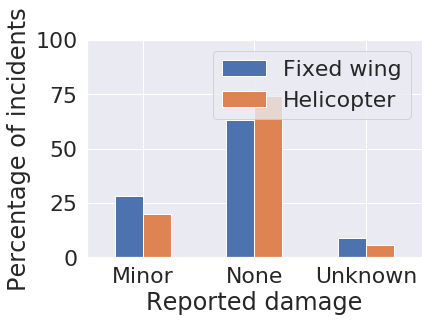

In [12]:
hits = pd.DataFrame({"heli":[7,26,2],"total":[81,192,25]},index=["Minor","None","Unknown"])
hits["Fixed wing"] = hits["total"] - hits["heli"]
hits = hits.drop("total",axis=1)
hits["Helicopter"] = hits["heli"]
hits = hits.drop("heli",axis=1)
hits /= hits.sum()
hits *=100

hits.plot(kind="bar",ylim=[0,100])
plt.ylabel("Percentage of incidents")
plt.xticks(rotation=0)
plt.xlabel("Reported damage");

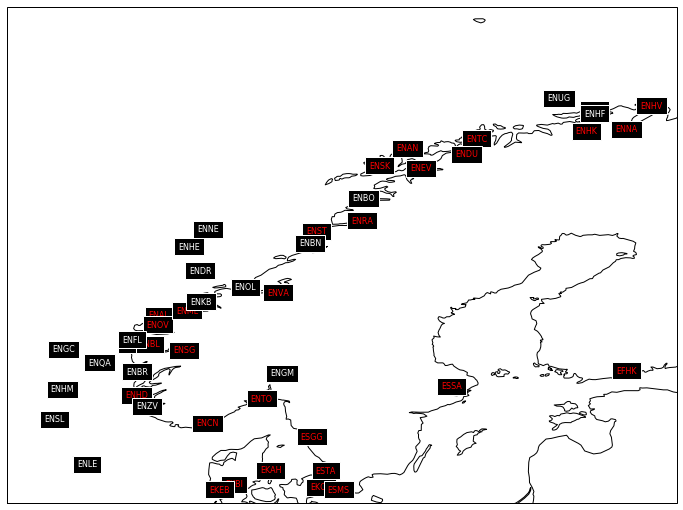

In [13]:
plotted = ["OffshoreNV","OffshoreN","YME","Offshore"]
standard_parallels = (63.3, 63.3)
central_longitude = 15.0
central_latitude = 63.3
proj = ccrs.LambertConformal(central_longitude=central_longitude,central_latitude=central_latitude,standard_parallels=standard_parallels)
metar = pd.read_csv(metar_source + "metar_stations_offshore_and_coast.txt",delimiter=";",index_col = 0)
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree())
def name(pos,name,c="white"):
    return ax.text(pos[0],pos[1],name,color=c,horizontalalignment='center',verticalalignment='center',fontsize=8,bbox=dict(facecolor='black'))

for i, row in ds.iterrows():
    if row[2] in plotted:
        continue
    name((row[5],row[4]),row[2],c="red")
    plotted.append(row[2])


for i,row in metar.iterrows():
    if row[0] == "ENQC":
        continue
    name((row[1],row[2]),row[0])


ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61
#ax.background_img()
ax.set_xlim([-0,27])
ax.set_ylim([55,75])
ax.coastlines("50m")
fig.savefig("/home/johannestl/Desktop/masterfigurer/METAR.pdf")
plt.show()



# Data from Hardwick report, Figure 2

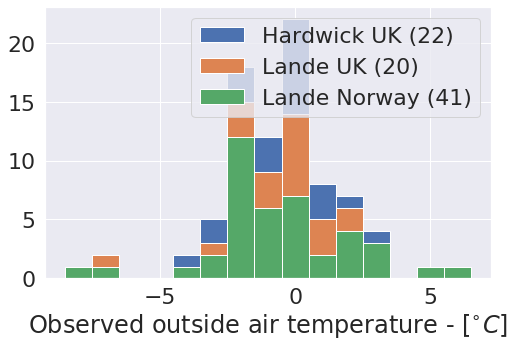

In [14]:
#Temperature Hardwick
hardwickT = [-4,-3,-3,-2,-2,-2,-1,-1,-1,0,0,0,0,0,0,0,0,1,1,1,2,3]
plt.figure(figsize=(8,5))
landenorwayT = [3,-4,-3,0,0,-2,6,-2,-8,0,0,-1,0,-7,-2,1,-2,3,0,-3,2,3,-2,2,-2,1,-2,0,-2,-1,-2,-2,5,-1,-1,-1,2,-2,-2,-1,2]
landeukT  = [1,2,2,0,0,1,0,0,0,-2,0,1,0,-1,-2,-2,-1,-1,-7,-3]
plt.hist(landeukT+landenorwayT+hardwickT,bins=np.linspace(-8.5,6.5,16),label="Hardwick UK (%i)"%len(hardwickT))
plt.hist(landeukT+landenorwayT,bins=np.linspace(-8.5,6.5,16),label="Lande UK (%i)"%len(landeukT))
plt.hist(landenorwayT,bins=np.linspace(-8.5,6.5,16),label="Lande Norway (%i)"%len(landenorwayT))
plt.legend()
plt.xlabel("Observed outside air temperature - [$^{\circ}C$]")
plt.savefig(outsource+"LandeTemp.pdf",bbox_inches = 'tight', pad_inches = 0.01)

Yearly variation of cases

In [39]:
landenorwayx = [1,1,1,1,1,2,1,1,12,4,1,1,1,3,11,1,1,4,10,12,2,11,11,12,1,10,2,3,11,1,1,2,1,1,3,3,3,2,2,2,10,12,2] 
landeukx = [4,11,11,11,11,12,10,1,2,2,10,10,1,2,3,12,12,2,2,12,2,3,4,12,2]
wilkinson = [10,1,11,2,3,2,3,1,2,10,3,2,2,11]

i,j,k,l,m = 0,0,0,0,0
L = np.zeros(12)

for item in landenorwayx:
    L[item-1] += 1
    i+=1
    
B = L
L = np.zeros(12)

for item in landeukx:
    L[item-1] += 1
    j+=1
    
BB = B + L
L = np.zeros(12)

for item in wilkinson:
    L[item-1] += 1
    k+=1

BBB = L + BB
L = np.zeros(12)
heli = np.zeros(12)

for DS in [ds,ands]:
    for index, row in DS.iterrows():
        month = int(str(row[0])[4:6])
        if row[-1] == "H":
            heli[month-1] += 1
            l+=1
        else:
            L[month-1] += 1
            m+=1

heli = BBB + heli
L = L + heli
R = 7

L = np.roll(L,R)
heli = np.roll(heli,R)
BBB = np.roll(BBB,R)
BB = np.roll(BB,R)
B = np.roll(B,R)
months = np.roll(M,R)


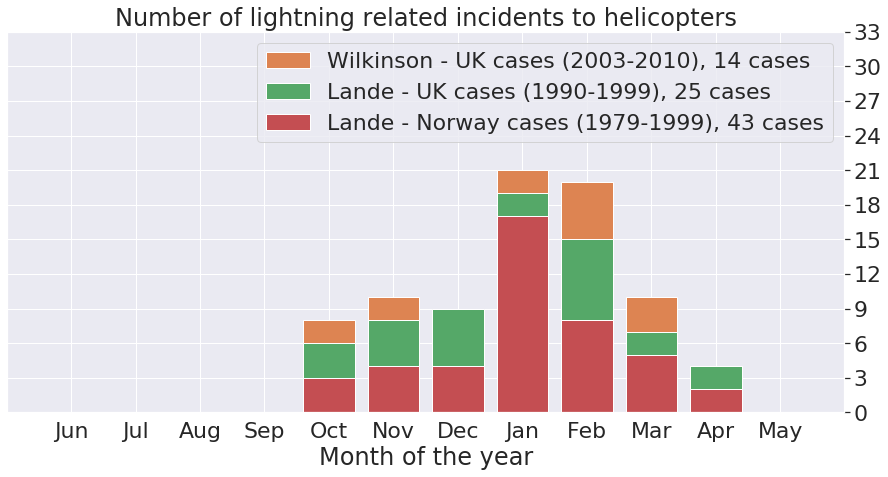

In [40]:
f=plt.figure(figsize=(15,7))
ax = f.add_subplot(111)
ax.yaxis.tick_right()


#plt.bar(range(0,12),L, label = "Avinor Fixed-Wing (2008-2019), %i cases"%m)
plt.bar(range(0,12),np.zeros(12))
plt.title("Number of lightning related incidents to helicopters")
plt.bar(range(0,12),BBB, label = "Wilkinson - UK cases (2003-2010), %i cases"%k)
plt.bar(range(0,12),BB,label = "Lande - UK cases (1990-1999), %i cases"%j)
plt.bar(range(0,12),B,label = "Lande - Norway cases (1979-1999), %i cases"%i)

plt.yticks(range(0,36,3))
plt.xticks(range(12),months)
plt.xlabel("Month of the year")
plt.legend()
f.savefig(outsource+"yearlydistribution_withoutmine.pdf")

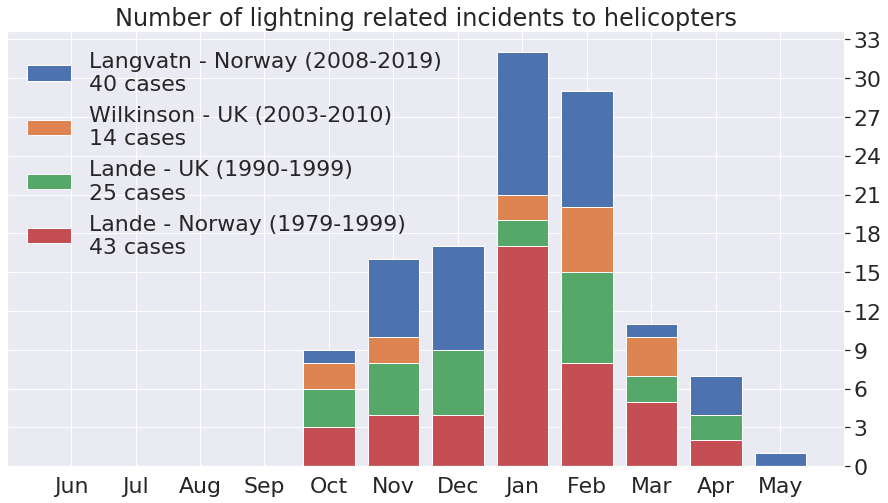

In [41]:
f=plt.figure(figsize=(15,8))
ax = f.add_subplot(111)
ax.yaxis.tick_right()


#plt.bar(range(0,12),L, label = "Avinor Fixed-Wing (2008-2019), %i cases"%m)
plt.title("Number of lightning related incidents to helicopters")
plt.bar(range(0,12),heli, label = "Langvatn - Norway (2008-2019)\n%i cases"%l)
plt.bar(range(0,12),BBB, label = "Wilkinson - UK (2003-2010)\n%i cases"%k)
plt.bar(range(0,12),BB,label = "Lande - UK (1990-1999)\n%i cases"%j)
plt.bar(range(0,12),B,label = "Lande - Norway (1979-1999)\n%i cases"%i)

plt.yticks(range(0,36,3))
plt.xticks(range(12),months)
plt.legend(loc="upper left",framealpha=0)
f.savefig(outsource+"yearlydistribution.pdf")

In [6]:
ands.head()


,date,time,place1,place2,height,temp,type
0,20120422,20,ENUS,ENBN,3000.0,NaN,H
1,20121230,13,ENBN,NaN,NaN,0.0,H
2,20130208,19,ENSE,ENFL,3000.0,NaN,H
3,20130318,20,ENZV,Offshore,2000.0,NaN,H
4,20130503,7,ENBR,ENQA,2000.0,NaN,H


In [4]:
for DS in [ds,ands]:
    for i,row in DS.iterrows():
        if row[-1] == "H":
            print(str(row[0])[:4],str(row[0])[4:6])

2009 02
2009 12
2012 10
2012 12
2013 04
2013 11
2015 01
2015 01
2015 02
2016 01
2016 01
2016 02
2016 12
2017 01
2017 01
2017 11
2018 01
2018 01
2018 02
2018 02
2018 02
2018 02
2018 02
2018 04
2012 04
2012 12
2013 02
2013 03
2013 05
2013 12
2014 12
2015 11
2015 11
2017 11
2017 11
2017 12
2018 01
2018 01
2018 01
2018 12


In [16]:
T_H = 0
T_F = 0
H_H = 0
H_F = 0
P_H = 0
P_F = 0
O_H = 0
O_F = 0
M_H = 0
M_F = 0

for DS in [ds,ands]:
    for i,row in DS.iterrows():
        dt = str(row[0])
        yr = int(dt[0:4])
        mth = int(dt[4:6])
        if row[-1] == "H":
            T_H +=1
            if abs(row[-2]) +1 > 0:
                O_H += 1
            if abs(row[-3]) > 0:
                H_H += 1
            if type(row[-5]) != str and abs(row[-5]) > 0:
                P_H += 1
                if not abs(row[-3]) > 0:
                    print(row)
            if yr > 2016 or yr == 2016 and mth >= 11:
                M_H += 1
        else:
            T_F +=1
            if  abs(row[-2]) +1 > 0:
                O_F += 1
            if abs(row[-3]) > 0:
                H_F += 1
            if type(row[-5]) != str and abs(row[-5]) > 0:
                P_F += 1
            if yr > 2016 or yr == 2016 and mth >= 11:
                M_F += 1   
print(T_H,H_H,P_H,O_H,M_H)
print(T_F,H_F,P_F,O_F,M_F)
print(T_F+T_H,H_H+H_F,P_H+P_F,O_H+O_F,M_H+M_F)

date      20150202
time            14
place1    Offshore
place2         NaN
lat         58.878
lon          5.632
height         NaN
temp           NaN
type             H
Name: 157, dtype: object
40 37 24 12 19
256 217 256 1 58
296 254 280 13 77


# Data from ERA5 and Avinor

In [7]:
for DS in [ds,ands]:
    for i, row in DS.iterrows():
        if row[-1] == "H":
            if row[2] in sørkyst:
                print(row)
        

date      20121016
time            16
place1        EKEB
place2         NaN
lat         55.526
lon          8.553
height        2000
temp           NaN
type             H
Name: 53, dtype: object


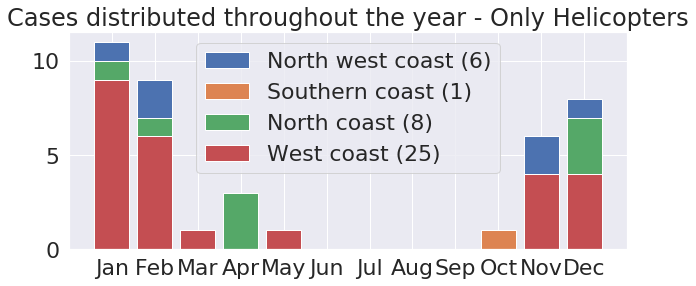

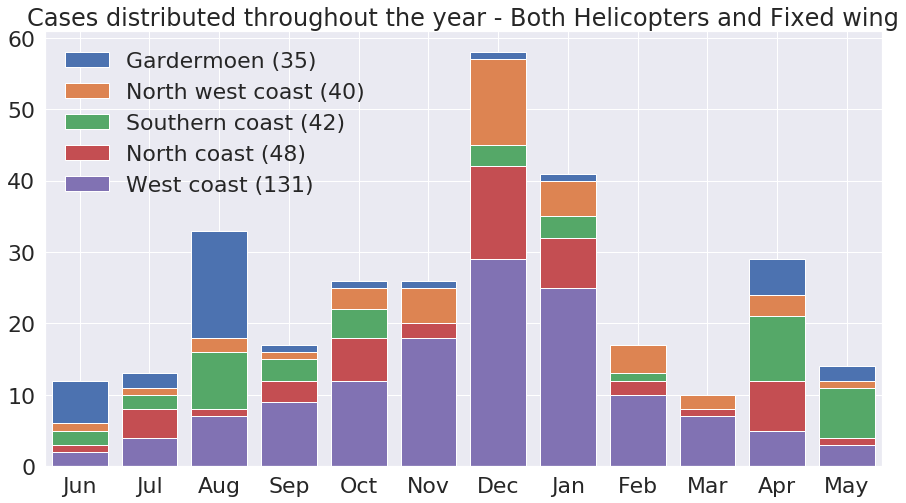

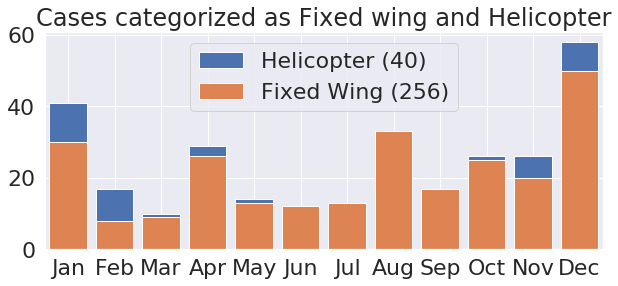

In [37]:
nord = ["ENRA","ENTC","ENBO","ENBN","ENUS","OffshoreN","ENAT","ENHK","ENHF","ENST","ENDU","ENNA","ENEV","ENAN","ENSK","ENHV"]
innland = ["ENGM"]
nordvest = ["ENAL","ENML","ENSE","ENKB","ENUC","OffshoreNV","ENVA","ENHE","ENOV","ENOL"]
vestkyst = ["ENFL","ENBR","ENZV","ENXA","ENXV","ENQS","ENQE","ENSF","Offshore","YME","ENBL","ENHD","ENSG"]
sørkyst = ["EKAH","ENCN","EKCH","EKBI","ESSA","EKEB","ENTO","ESMS","ESTA","EFHK","ESGG"]

N = np.zeros(12)
NH = np.zeros(12)

I = np.zeros(12)

NV = np.zeros(12)
NVH = np.zeros(12)

V = np.zeros(12)
VH = np.zeros(12)

S = np.zeros(12)
SH = np.zeros(12)

H = np.zeros(12)
FW = np.zeros(12)

for DS in [ds,ands]:
    for i,row in DS.iterrows():
        place = row[2]
        month = int(str(row[0])[4:6])
        h=0
        if row[-1] == "H":
            H[month-1] += 1
            h = 1
        else: 
            FW[month-1] += 1
            
        if place in nord:
            N[month-1] += 1
            NH[month-1] += h
        elif place in nordvest:
            NV[month-1] += 1
            NVH[month-1] += h
        elif place in vestkyst:
            V[month-1] += 1
            VH[month-1] += h
        elif place in sørkyst:
            S[month-1] += 1
            SH[month-1] += h
        elif place in innland:
            I[month-1] += 1
        else:
            print(row)

f=plt.figure(figsize=(10,4))
ax = f.add_subplot(111)

T = VH+NH+SH+NVH
LEG = ["North west coast","Southern coast","North coast","West coast"]
for i,part in enumerate([NVH,SH,NH,VH]):
    LEG[i] += " (%i)"%(sum(part))
    plt.bar(range(12),T)
    T -= part
plt.xticks(range(12),M)

plt.title("Cases distributed throughout the year - Only Helicopters")
plt.legend(LEG)
f.savefig(outsource+"Helisoner.pdf")

f=plt.figure(figsize=(15,8))
ax = f.add_subplot(111)

T = V+N+S+NV+I
LEG = ["Gardermoen","North west coast","Southern coast","North coast","West coast"]
for i,part in enumerate([I,NV,S,N,V]):
    LEG[i] += " (%i)"%(sum(part))
    plt.bar(range(12),np.roll(T,R))
    T -= part
plt.xticks(range(12),months)

plt.title("Cases distributed throughout the year - Both Helicopters and Fixed wing")
plt.legend(LEG,framealpha=0)

plt.xlim(-0.5,11.5)
f.savefig(outsource+"soner.pdf")
f=plt.figure(figsize=(10,4))
ax = f.add_subplot(111)
            
plt.bar(range(12),H+FW,label="Helicopter (%i)"%(sum(H)))
plt.bar(range(12),FW,label="Fixed Wing (%i)"%(sum(FW)))
plt.xticks(range(12),M)

plt.title("Cases categorized as Fixed wing and Helicopter")
plt.legend()
plt.xlim(-0.5,11.5)
f.savefig(outsource+"helivsfw.pdf")
